In [4]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, h5py
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline

# Metrics and preprocessing
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# TF and Keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import tensorflow as tf

In [5]:
import h5py
import numpy as np
h5_SVH =h5py.File('SVHN_single_grey1.h5', 'r')
X_train = h5_SVH['X_train'][:]
y_train_o = h5_SVH['y_train'][:]
X_val = h5_SVH['X_val'][:]
y_val_o = h5_SVH['y_val'][:]
X_test = h5_SVH['X_test'][:]
y_test_o = h5_SVH['y_test'][:]
h5_SVH.close()

print('Training set', X_train.shape, y_train_o.shape)
print('Validation set', X_val.shape, y_val_o.shape)
print('Test set', X_test.shape, y_test_o.shape)

print('\n')
print('Unique labels in y_train:', np.unique(y_train_o))
print('Unique labels in y_val:', np.unique(y_val_o))
print('Unique labels in y_test:', np.unique(y_test_o))

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_val: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


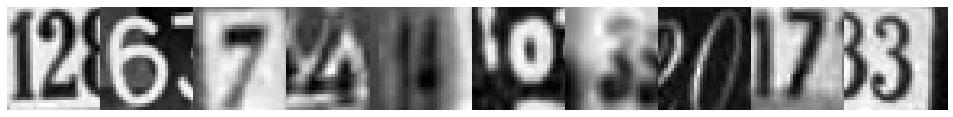

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# Visualizing first 10 images in the dataset and their labels
plt.figure(figsize = (15, 4.5))
for i in range(10):  
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape((32, 32)),cmap = plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace = -0.1, hspace = -0.1)
plt.show()

print('Label for each of the above image: %s' % (y_train_o[0 : 10]))

Checking first image and label in training set
--------------------------------------------------------------------------------


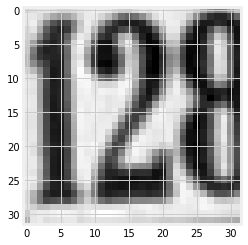

Label: 2


In [7]:
print('Checking first image and label in training set'); print('--'*40)
plt.imshow(X_train[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_train_o[0])

Checking first image and label in validation set
--------------------------------------------------------------------------------


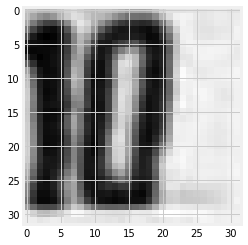

Label: 0


In [8]:
print('Checking first image and label in validation set'); print('--'*40)
plt.imshow(X_val[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_val_o[0])

Checking first image and label in test set
--------------------------------------------------------------------------------


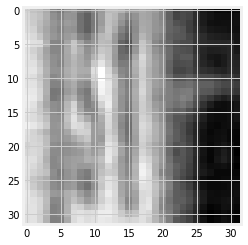

Label: 1


In [9]:
print('Checking first image and label in test set'); print('--'*40)
plt.imshow(X_test[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_test_o[0])

Normalize the images for Keras

In [10]:
print('Reshaping X data: (n, 32, 32) => (n, 1024)'); print('--'*40)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print('Making sure that the values are float so that we can get decimal points after division'); print('--'*40)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*40)
X_train /= 255
X_val /= 255
X_test /= 255

print('Converting y data into categorical (one-hot encoding)'); print('--'*40)
y_train = to_categorical(y_train_o)
y_val = to_categorical(y_val_o)
y_test = to_categorical(y_test_o)

Reshaping X data: (n, 32, 32) => (n, 1024)
--------------------------------------------------------------------------------
Making sure that the values are float so that we can get decimal points after division
--------------------------------------------------------------------------------
Normalizing the RGB codes by dividing it to the max RGB value
--------------------------------------------------------------------------------
Converting y data into categorical (one-hot encoding)
--------------------------------------------------------------------------------


In [11]:
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

print('\n')
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

print('\n')
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_val', X_val.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (42000, 1024)
X_val shape: (60000, 1024)
X_test shape: (18000, 1024)


y_train shape: (42000, 10)
y_val shape: (60000, 10)
y_test shape: (18000, 10)


Number of images in X_train 42000
Number of images in X_val 60000
Number of images in X_test 18000


Modelling

In [12]:
class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None        

    def forward(self, X):
        self.X = X
        self.output = np.dot(X, self.W) + self.b
        return self.output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

In [13]:
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

In [14]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [15]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

NN class: To enable the forward prop and backward propagation of the entire network

In [16]:
class NN():
    def __init__(self, lossfunc = CrossEntropy(), mode = 'train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)
        nextgrad = self.loss_func.backward(out,y)
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []

Update function SGD

In [17]:
def update(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = (mu * v[i]) - (learning_rate * g[i])
            p[i] += v[i]

Get minibatches

In [19]:
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]
        minibatches.append((X_batch, y_batch))
        
    return minibatches

training loop

In [20]:
def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu = 0.9, X_val = None, y_val = None, Lambda = 0, verb = True):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)
    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = []
        y_val_pred = []
        y_train1 = []
        y_vall = []
        for ii in range(0, m_train, minibatch_size):
            X_tr = X_train[ii:ii + minibatch_size, : ]
            y_tr = y_train[ii:ii + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for ii in range(0, m_val, minibatch_size):
            X_va = X_val[ii:ii + minibatch_size, : ]
            y_va = y_val[ii:ii + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)
        
        ## weights
        w = np.array(net.params[0][0])
        
        ## adding regularization to cost
        mean_train_loss = (sum(loss_batch) / float(len(loss_batch)))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        if verb:
            if i%50==0:
                print("Epoch {3}/{4}: Loss = {0} | Training Accuracy = {1}".format(mean_train_loss, train_acc, val_acc, i, epoch))
    return net, val_acc

Checking the accuracy of the model

In [21]:
def check_accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true)

Invoking Model

In [22]:
input_dim = X_train.shape[1]

def train_and_test_loop(iterations, lr, Lambda, verb = True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes1 = 10
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, hidden_nodes1))

    nn, val_acc = train(nn, X_train, y_train_o, minibatch_size = 200, epoch = iterations, learning_rate = learning_rate,\
                      X_val = X_test, y_val = y_test_o, Lambda = Lambda, verb = verb)
    return val_acc

Checking Accuracy

In [23]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 2.31145751021053 | Training Accuracy = 0.09942857142857142


0.09994444444444445

Lambda

In [24]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 2.31083154726018 | Training Accuracy = 0.10211904761904762


0.09766666666666667

Overfitting small subset of dataset

In [25]:
X_train_subset = X_train[0:20]
y_train_subset = y_train_o[0:20]

X_train = X_train_subset
y_train_o = y_train_subset

X_train.shape, y_train_o.shape

((20, 1024), (20,))

In [26]:
%time
lr = 0.001
Lambda = 0
train_and_test_loop(5000, lr, Lambda)

Wall time: 0 ns
Epoch 0/5000: Loss = 2.3410260505103104 | Training Accuracy = 0.0
Epoch 50/5000: Loss = 1.9484721432438152 | Training Accuracy = 0.2
Epoch 100/5000: Loss = 1.8629771444497294 | Training Accuracy = 0.25
Epoch 150/5000: Loss = 1.808252871522988 | Training Accuracy = 0.4
Epoch 200/5000: Loss = 1.7628209816084148 | Training Accuracy = 0.45
Epoch 250/5000: Loss = 1.7219836275204412 | Training Accuracy = 0.45
Epoch 300/5000: Loss = 1.6840509838924587 | Training Accuracy = 0.45
Epoch 350/5000: Loss = 1.6482491522071263 | Training Accuracy = 0.45
Epoch 400/5000: Loss = 1.6141651198456024 | Training Accuracy = 0.45
Epoch 450/5000: Loss = 1.5815505939581838 | Training Accuracy = 0.45
Epoch 500/5000: Loss = 1.550240485555644 | Training Accuracy = 0.5
Epoch 550/5000: Loss = 1.5201153707222175 | Training Accuracy = 0.5
Epoch 600/5000: Loss = 1.4910828249562003 | Training Accuracy = 0.5
Epoch 650/5000: Loss = 1.4630675226110386 | Training Accuracy = 0.55
Epoch 700/5000: Loss = 1.4360

0.13622222222222222

Reloading dataset

In [27]:
h5_SVH = h5py.File('SVHN_single_grey1.h5', 'r')
# Load the training, validation and test sets
X_train = h5_SVH['X_train'][:]
y_train_o = h5_SVH['y_train'][:]
X_val = h5_SVH['X_val'][:]
y_val_o = h5_SVH['y_val'][:]
X_test = h5_SVH['X_test'][:]
y_test_o = h5_SVH['y_test'][:]

print('Reshaping X data: (n, 32, 32) => (n, 1024)'); print('--'*40)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print('Making sure that the values are float so that we can get decimal points after division'); print('--'*40)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*40)
X_train /= 255
X_val /= 255
X_test /= 255

print('Converting y data into categorical (one-hot encoding)'); print('--'*40)
y_train = to_categorical(y_train_o)
y_val = to_categorical(y_val_o)
y_test = to_categorical(y_test_o)

Reshaping X data: (n, 32, 32) => (n, 1024)
--------------------------------------------------------------------------------
Making sure that the values are float so that we can get decimal points after division
--------------------------------------------------------------------------------
Normalizing the RGB codes by dividing it to the max RGB value
--------------------------------------------------------------------------------
Converting y data into categorical (one-hot encoding)
--------------------------------------------------------------------------------


In [28]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.3118413056955553 | Training Accuracy = 0.0871904761904762
Epoch 50/500: Loss = 2.308826163772622 | Training Accuracy = 0.0864047619047619
Epoch 100/500: Loss = 2.3068079766788525 | Training Accuracy = 0.087
Epoch 150/500: Loss = 2.3054636893174876 | Training Accuracy = 0.08830952380952381
Epoch 200/500: Loss = 2.3045711917313594 | Training Accuracy = 0.0889047619047619
Epoch 250/500: Loss = 2.3039793425722417 | Training Accuracy = 0.09007142857142857
Epoch 300/500: Loss = 2.3035862772635394 | Training Accuracy = 0.09219047619047618
Epoch 350/500: Loss = 2.303323923229406 | Training Accuracy = 0.0929047619047619
Epoch 400/500: Loss = 2.3031471204305785 | Training Accuracy = 0.09304761904761905
Epoch 450/500: Loss = 2.303026092974717 | Training Accuracy = 0.09369047619047619


0.09522222222222222

In [29]:
lr = 0.001
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.304271081101503 | Training Accuracy = 0.10133333333333333
Epoch 50/500: Loss = 2.259087415222741 | Training Accuracy = 0.19452380952380952
Epoch 100/500: Loss = 2.2506304095552445 | Training Accuracy = 0.2059047619047619
Epoch 150/500: Loss = 2.2463310071351974 | Training Accuracy = 0.21114285714285713
Epoch 200/500: Loss = 2.2434506448186844 | Training Accuracy = 0.21521428571428572
Epoch 250/500: Loss = 2.241281719281938 | Training Accuracy = 0.21888095238095237
Epoch 300/500: Loss = 2.2395416928283214 | Training Accuracy = 0.22066666666666668
Epoch 350/500: Loss = 2.2380883803939016 | Training Accuracy = 0.2221904761904762
Epoch 400/500: Loss = 2.2368397887387372 | Training Accuracy = 0.22357142857142856
Epoch 450/500: Loss = 2.2357443025849273 | Training Accuracy = 0.2245952380952381


0.20694444444444443

Hyperparameter Optimization

In [30]:
import math
for k in range(1, 10):
    lr = math.pow(10, np.random.uniform(-3.0, -2.0))
    Lambda = math.pow(10, np.random.uniform(-5, 2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Try 1/10: Best_val_acc: 0.20072222222222222, lr: 0.003764414422989899, Lambda: 2.8312476335336574

Try 2/10: Best_val_acc: 0.19416666666666665, lr: 0.007829359462566987, Lambda: 2.2323094795678966e-05

Try 3/10: Best_val_acc: 0.2106111111111111, lr: 0.0028730581729452817, Lambda: 0.0038304889939502875

Try 4/10: Best_val_acc: 0.2115, lr: 0.0014450887226288862, Lambda: 92.43661585102781

Try 5/10: Best_val_acc: 0.20183333333333334, lr: 0.00102027647169909, Lambda: 5.238648685054541e-05

Try 6/10: Best_val_acc: 0.20622222222222222, lr: 0.0016802640086022525, Lambda: 0.3469048194222294

Try 7/10: Best_val_acc: 0.20277777777777778, lr: 0.007108224897130439, Lambda: 34.312418297180585

Try 8/10: Best_val_acc: 0.20205555555555554, lr: 0.002106154057936919, Lambda: 0.00023780986424822543

Try 9/10: Best_val_acc: 0.2066111111111111, lr: 0.004259695944877485, Lambda: 0.9546624124101437



Observation : Best accuracy achieved using this method after hyperparameter optimization: 21%

Modelling - Neural Network API

In [31]:
print('NN model with sigmoid activations'); print('--'*40)
# Initialize the neural network classifier
model1 = Sequential()

# Input Layer - adding input layer and activation functions sigmoid
model1.add(Dense(128, input_shape = (1024, )))
# Adding activation function
model1.add(Activation('sigmoid'))

#Hidden Layer 1 - adding first hidden layer
model1.add(Dense(64))
# Adding activation function
model1.add(Activation('sigmoid'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model1.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model1.add(Activation('softmax'))

NN model with sigmoid activations
--------------------------------------------------------------------------------


In [32]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 140,106
Trainable params: 140,106
Non-trainable params: 0
__________________________________________________

In [33]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model1.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 8s 183us/sample - loss: 2.3090 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.1074
Epoch 2/100
42000/42000 [==============================] - 3s 79us/sample - loss: 2.3030 - accuracy: 0.1037 - val_loss: 2.3027 - val_accuracy: 0.1041
Epoch 3/100
42000/42000 [==============================] - 3s 78us/sample - loss: 2.3030 - accuracy: 0.1028 - val_loss: 2.3027 - val_accuracy: 0.1034
Epoch 4/100
42000/42000 [==============================] - 3s 81us/sample - loss: 2.3028 - accuracy: 0.1042 - val_loss: 2.3027 - val_accuracy: 0.0973
Epoch 5/100
42000/42000 [==============================] - 4s 92us/sample - loss: 2.3028 - accuracy: 0.1035 - val_loss: 2.3028 - val_accuracy: 0.1027
Epoch 6/100
42000/42000 [==============================] - 3s 77us/sample - loss: 2.3029 - accuracy: 0.1023 - val_loss: 2.3026 - val_accuracy: 0.1058
Epoch 7/100
42000/42000 [========================

Epoch 55/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.3010 - accuracy: 0.1188 - val_loss: 2.3009 - val_accuracy: 0.1175
Epoch 56/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.3010 - accuracy: 0.1224 - val_loss: 2.3008 - val_accuracy: 0.1257
Epoch 57/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.3009 - accuracy: 0.1185 - val_loss: 2.3010 - val_accuracy: 0.1170
Epoch 58/100
42000/42000 [==============================] - 3s 76us/sample - loss: 2.3009 - accuracy: 0.1191 - val_loss: 2.3008 - val_accuracy: 0.1192
Epoch 59/100
42000/42000 [==============================] - 3s 81us/sample - loss: 2.3008 - accuracy: 0.1196 - val_loss: 2.3010 - val_accuracy: 0.1076
Epoch 60/100
42000/42000 [==============================] - 3s 75us/sample - loss: 2.3008 - accuracy: 0.1178 - val_loss: 2.3009 - val_accuracy: 0.1196
Epoch 61/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.3009 - ac

In [34]:
print('Evaluate NN model with sigmoid activations'); print('--'*40)
results1 = model1.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results1[1]*100, 2), '%'))

Evaluate NN model with sigmoid activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 6s 102us/sample - loss: 2.2993 - accuracy: 0.1463
Validation accuracy: 14.63


NN model, sigmoid activations, SGD optimizer, changing learning rate

In [35]:
print('NN model with sigmoid activations - changing learning rate'); print('--'*40)
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.001)
model1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model1.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

NN model with sigmoid activations - changing learning rate
--------------------------------------------------------------------------------
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 10s 240us/sample - loss: 2.2991 - accuracy: 0.1475 - val_loss: 2.2992 - val_accuracy: 0.1488
Epoch 2/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.2990 - accuracy: 0.1502 - val_loss: 2.2992 - val_accuracy: 0.1490
Epoch 3/100
42000/42000 [==============================] - 3s 71us/sample - loss: 2.2990 - accuracy: 0.1495 - val_loss: 2.2992 - val_accuracy: 0.1479
Epoch 4/100
42000/42000 [==============================] - 3s 75us/sample - loss: 2.2990 - accuracy: 0.1463 - val_loss: 2.2992 - val_accuracy: 0.1469
Epoch 5/100
42000/42000 [==============================] - 3s 71us/sample - loss: 2.2990 - accuracy: 0.1467 - val_loss: 2.2991 - val_accuracy: 0.1463
Epoch 6/100
42000/42000 [==============================] -

42000/42000 [==============================] - 3s 71us/sample - loss: 2.2988 - accuracy: 0.1479 - val_loss: 2.2989 - val_accuracy: 0.1452
Epoch 55/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.2988 - accuracy: 0.1475 - val_loss: 2.2989 - val_accuracy: 0.1445
Epoch 56/100
42000/42000 [==============================] - 3s 72us/sample - loss: 2.2988 - accuracy: 0.1464 - val_loss: 2.2989 - val_accuracy: 0.1447
Epoch 57/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.2988 - accuracy: 0.1457 - val_loss: 2.2989 - val_accuracy: 0.1449
Epoch 58/100
42000/42000 [==============================] - 3s 75us/sample - loss: 2.2988 - accuracy: 0.1470 - val_loss: 2.2989 - val_accuracy: 0.1445
Epoch 59/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.2988 - accuracy: 0.1471 - val_loss: 2.2989 - val_accuracy: 0.1440
Epoch 60/100
42000/42000 [==============================] - 3s 72us/sample - loss: 2.2988 - accuracy: 0.143

In [36]:
print('Evaluate NN model with sigmoid activations - changing learning rate'); print('--'*40)
results1 = model1.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results1[1]*100, 2), '%'))

Evaluate NN model with sigmoid activations - changing learning rate
--------------------------------------------------------------------------------
60000/60000 [==============================] - 6s 101us/sample - loss: 2.2987 - accuracy: 0.1454
Validation accuracy: 14.54


Observation:
Validation score is very low, changing learning rate further reduces it.
Optimizing the network in order to better learn the patterns in the dataset.
Best model is the one with lower learning rate using SGD optimizer and sigmoid activations.

NN model, relu activations, SGD optimizer

In [37]:
%time
print('NN model with relu activations and sgd optimizers'); print('--'*40)
# Initialize the neural network classifier
model2 = Sequential()

# Input Layer - adding input layer and activation functions relu
model2.add(Dense(128, input_shape = (1024, )))
# Adding activation function
model2.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model2.add(Dense(64))
# Adding activation function
model2.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model2.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model2.add(Activation('softmax'))

Wall time: 0 ns
NN model with relu activations and sgd optimizers
--------------------------------------------------------------------------------


In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               131200    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 140,106
Trainable params: 140,106
Non-trainable params: 0
________________________________________________

In [39]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 104us/sample - loss: 2.3068 - accuracy: 0.1071 - val_loss: 2.3000 - val_accuracy: 0.1090
Epoch 2/100
42000/42000 [==============================] - 3s 72us/sample - loss: 2.2961 - accuracy: 0.1207 - val_loss: 2.2924 - val_accuracy: 0.1205
Epoch 3/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.2889 - accuracy: 0.1326 - val_loss: 2.2853 - val_accuracy: 0.1471
Epoch 4/100
42000/42000 [==============================] - 3s 74us/sample - loss: 2.2811 - accuracy: 0.1535 - val_loss: 2.2767 - val_accuracy: 0.1526
Epoch 5/100
42000/42000 [==============================] - 3s 69us/sample - loss: 2.2708 - accuracy: 0.1768 - val_loss: 2.2652 - val_accuracy: 0.1892
Epoch 6/100
42000/42000 [==============================] - 3s 69us/sample - loss: 2.2587 - accuracy: 0.1998 - val_loss: 2.2512 - val_accuracy: 0.2151
Epoch 7/100
42000/42000 [========================

Epoch 55/100
42000/42000 [==============================] - 3s 69us/sample - loss: 0.9539 - accuracy: 0.7154 - val_loss: 0.9628 - val_accuracy: 0.7147
Epoch 56/100
42000/42000 [==============================] - 3s 68us/sample - loss: 0.9448 - accuracy: 0.7178 - val_loss: 0.9245 - val_accuracy: 0.7279
Epoch 57/100
42000/42000 [==============================] - 3s 71us/sample - loss: 0.9356 - accuracy: 0.7221 - val_loss: 0.9312 - val_accuracy: 0.7230
Epoch 58/100
42000/42000 [==============================] - 3s 74us/sample - loss: 0.9304 - accuracy: 0.7213 - val_loss: 0.9432 - val_accuracy: 0.7179
Epoch 59/100
42000/42000 [==============================] - 3s 69us/sample - loss: 0.9217 - accuracy: 0.7244 - val_loss: 0.9177 - val_accuracy: 0.7270
Epoch 60/100
42000/42000 [==============================] - 3s 68us/sample - loss: 0.9138 - accuracy: 0.7289 - val_loss: 0.9277 - val_accuracy: 0.7217
Epoch 61/100
42000/42000 [==============================] - 3s 69us/sample - loss: 0.9074 - ac

In [40]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 72us/sample - loss: 0.7448 - accuracy: 0.7796
Validation accuracy: 77.96


NN model, relu activations, SGD optimizer, changing learning rate

In [41]:
%time
print('NN model with relu activations and sgd optimizers - changing learning rate'); print('--'*40)
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.001)
model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Wall time: 0 ns
NN model with relu activations and sgd optimizers - changing learning rate
--------------------------------------------------------------------------------
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 92us/sample - loss: 0.6828 - accuracy: 0.8002 - val_loss: 0.7054 - val_accuracy: 0.7933
Epoch 2/100
42000/42000 [==============================] - 3s 69us/sample - loss: 0.6808 - accuracy: 0.8002 - val_loss: 0.7026 - val_accuracy: 0.7959
Epoch 3/100
42000/42000 [==============================] - 3s 69us/sample - loss: 0.6796 - accuracy: 0.8020 - val_loss: 0.7025 - val_accuracy: 0.7963
Epoch 4/100
42000/42000 [==============================] - 3s 70us/sample - loss: 0.6793 - accuracy: 0.8020 - val_loss: 0.7016 - val_accuracy: 0.7953
Epoch 5/100
42000/42000 [==============================] - 3s 74us/sample - loss: 0.6788 - accuracy: 0.8012 - val_loss: 0.7019 - val_accuracy: 0.7963
Epoch 6/100
42000/42000 [===

Epoch 54/100
42000/42000 [==============================] - 3s 70us/sample - loss: 0.6600 - accuracy: 0.8070 - val_loss: 0.6844 - val_accuracy: 0.8007
Epoch 55/100
42000/42000 [==============================] - 3s 69us/sample - loss: 0.6599 - accuracy: 0.8078 - val_loss: 0.6843 - val_accuracy: 0.8018
Epoch 56/100
42000/42000 [==============================] - 3s 68us/sample - loss: 0.6592 - accuracy: 0.8072 - val_loss: 0.6841 - val_accuracy: 0.8016
Epoch 57/100
42000/42000 [==============================] - 3s 71us/sample - loss: 0.6591 - accuracy: 0.8076 - val_loss: 0.6829 - val_accuracy: 0.8012
Epoch 58/100
42000/42000 [==============================] - 3s 74us/sample - loss: 0.6584 - accuracy: 0.8084 - val_loss: 0.6845 - val_accuracy: 0.8017
Epoch 59/100
42000/42000 [==============================] - 3s 73us/sample - loss: 0.6584 - accuracy: 0.8068 - val_loss: 0.6829 - val_accuracy: 0.8025
Epoch 60/100
42000/42000 [==============================] - 3s 70us/sample - loss: 0.6577 - ac

In [42]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 71us/sample - loss: 0.6698 - accuracy: 0.8060
Validation accuracy: 80.6


NN model, relu activations, adam optimizer

In [43]:
%time
print('NN model with relu activations and adam optimizer'); print('--'*40)
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.01)
model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Wall time: 0 ns
NN model with relu activations and adam optimizer
--------------------------------------------------------------------------------
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 111us/sample - loss: 3.3043 - accuracy: 0.1234 - val_loss: 2.2424 - val_accuracy: 0.1247
Epoch 2/100
42000/42000 [==============================] - 3s 80us/sample - loss: 2.2110 - accuracy: 0.1452 - val_loss: 2.1955 - val_accuracy: 0.1651
Epoch 3/100
42000/42000 [==============================] - 3s 72us/sample - loss: 2.0439 - accuracy: 0.2338 - val_loss: 1.8129 - val_accuracy: 0.3436
Epoch 4/100
42000/42000 [==============================] - 3s 73us/sample - loss: 1.7344 - accuracy: 0.3807 - val_loss: 1.6330 - val_accuracy: 0.4141
Epoch 5/100
42000/42000 [==============================] - 3s 72us/sample - loss: 1.5300 - accuracy: 0.4736 - val_loss: 1.4508 - val_accuracy: 0.5065
Epoch 6/100
42000/42000 [===========================

42000/42000 [==============================] - 3s 77us/sample - loss: 0.9885 - accuracy: 0.6968 - val_loss: 0.9696 - val_accuracy: 0.7021
Epoch 55/100
42000/42000 [==============================] - 3s 73us/sample - loss: 0.9823 - accuracy: 0.6980 - val_loss: 1.0683 - val_accuracy: 0.6715
Epoch 56/100
42000/42000 [==============================] - 3s 72us/sample - loss: 0.9941 - accuracy: 0.6928 - val_loss: 0.9782 - val_accuracy: 0.6983
Epoch 57/100
42000/42000 [==============================] - 3s 72us/sample - loss: 0.9812 - accuracy: 0.6975 - val_loss: 1.0006 - val_accuracy: 0.6937
Epoch 58/100
42000/42000 [==============================] - 3s 73us/sample - loss: 0.9875 - accuracy: 0.6967 - val_loss: 1.0053 - val_accuracy: 0.6878
Epoch 59/100
42000/42000 [==============================] - 3s 75us/sample - loss: 0.9909 - accuracy: 0.6964 - val_loss: 0.9611 - val_accuracy: 0.7053
Epoch 60/100
42000/42000 [==============================] - 3s 73us/sample - loss: 0.9824 - accuracy: 0.696

In [44]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 71us/sample - loss: 0.9943 - accuracy: 0.6916
Validation accuracy: 69.16


NN model, relu activations, adam optimizer, changing learning rate

In [45]:
%time
print('NN model with relu activations and adam optimizer'); print('--'*40)
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Wall time: 0 ns
NN model with relu activations and adam optimizer
--------------------------------------------------------------------------------
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 104us/sample - loss: 0.8512 - accuracy: 0.7421 - val_loss: 0.8583 - val_accuracy: 0.7405
Epoch 2/100
42000/42000 [==============================] - 3s 77us/sample - loss: 0.8413 - accuracy: 0.7432 - val_loss: 0.8521 - val_accuracy: 0.7419
Epoch 3/100
42000/42000 [==============================] - 3s 78us/sample - loss: 0.8396 - accuracy: 0.7439 - val_loss: 0.8550 - val_accuracy: 0.7398
Epoch 4/100
42000/42000 [==============================] - 3s 72us/sample - loss: 0.8376 - accuracy: 0.7460 - val_loss: 0.8507 - val_accuracy: 0.7420
Epoch 5/100
42000/42000 [==============================] - 3s 72us/sample - loss: 0.8363 - accuracy: 0.7450 - val_loss: 0.8587 - val_accuracy: 0.7386
Epoch 6/100
42000/42000 [===========================

42000/42000 [==============================] - 3s 73us/sample - loss: 0.8218 - accuracy: 0.7483 - val_loss: 0.8435 - val_accuracy: 0.7446
Epoch 55/100
42000/42000 [==============================] - 3s 75us/sample - loss: 0.8219 - accuracy: 0.7482 - val_loss: 0.8425 - val_accuracy: 0.7439
Epoch 56/100
42000/42000 [==============================] - 3s 71us/sample - loss: 0.8191 - accuracy: 0.7490 - val_loss: 0.8435 - val_accuracy: 0.7446
Epoch 57/100
42000/42000 [==============================] - 3s 72us/sample - loss: 0.8197 - accuracy: 0.7489 - val_loss: 0.8402 - val_accuracy: 0.7454
Epoch 58/100
42000/42000 [==============================] - 3s 71us/sample - loss: 0.8219 - accuracy: 0.7465 - val_loss: 0.8400 - val_accuracy: 0.7452
Epoch 59/100
42000/42000 [==============================] - 3s 73us/sample - loss: 0.8202 - accuracy: 0.7491 - val_loss: 0.8437 - val_accuracy: 0.7446
Epoch 60/100
42000/42000 [==============================] - 3s 77us/sample - loss: 0.8212 - accuracy: 0.749

In [46]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 72us/sample - loss: 0.8347 - accuracy: 0.7471
Validation accuracy: 74.71


Observation - NN model with relu activations
Improves the scores considerably.
Best accuracy achieved using relu activations, SGD optimizer, changing learning rate to 0.001.

NN model, relu activations, changing number of activators, SGD optimizers after changing number of activators

In [47]:
print('NN model with relu activations and changing number of activators'); print('--'*40)
# Initialize the neural network classifier
model3 = Sequential()

# Input Layer - adding input layer and activation functions relu
model3.add(Dense(256, input_shape = (1024, )))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model3.add(Dense(128))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 2 - Adding second hidden layer
model3.add(Dense(64))
# Adding activation function
model3.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model3.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model3.add(Activation('softmax'))

NN model with relu activations and changing number of activators
--------------------------------------------------------------------------------


In [48]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [49]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 140us/sample - loss: 2.2975 - accuracy: 0.1270 - val_loss: 2.2879 - val_accuracy: 0.1415
Epoch 2/100
42000/42000 [==============================] - 4s 107us/sample - loss: 2.2806 - accuracy: 0.1650 - val_loss: 2.2721 - val_accuracy: 0.1831
Epoch 3/100
42000/42000 [==============================] - 5s 107us/sample - loss: 2.2642 - accuracy: 0.2020 - val_loss: 2.2553 - val_accuracy: 0.2164
Epoch 4/100
42000/42000 [==============================] - 5s 110us/sample - loss: 2.2440 - accuracy: 0.2331 - val_loss: 2.2312 - val_accuracy: 0.2519
Epoch 5/100
42000/42000 [==============================] - 5s 114us/sample - loss: 2.2180 - accuracy: 0.2603 - val_loss: 2.2002 - val_accuracy: 0.2794
Epoch 6/100
42000/42000 [==============================] - 5s 107us/sample - loss: 2.1825 - accuracy: 0.2839 - val_loss: 2.1600 - val_accuracy: 0.2971
Epoch 7/100
42000/42000 [===================

42000/42000 [==============================] - 4s 107us/sample - loss: 0.8386 - accuracy: 0.7464 - val_loss: 0.8282 - val_accuracy: 0.7518
Epoch 55/100
42000/42000 [==============================] - 5s 107us/sample - loss: 0.8302 - accuracy: 0.7485 - val_loss: 0.8303 - val_accuracy: 0.7505
Epoch 56/100
42000/42000 [==============================] - 5s 112us/sample - loss: 0.8262 - accuracy: 0.7488 - val_loss: 0.8279 - val_accuracy: 0.7498
Epoch 57/100
42000/42000 [==============================] - 5s 110us/sample - loss: 0.8205 - accuracy: 0.7514 - val_loss: 0.8359 - val_accuracy: 0.7483
Epoch 58/100
42000/42000 [==============================] - 4s 107us/sample - loss: 0.8146 - accuracy: 0.7536 - val_loss: 0.8102 - val_accuracy: 0.7562
Epoch 59/100
42000/42000 [==============================] - 5s 109us/sample - loss: 0.8064 - accuracy: 0.7557 - val_loss: 0.8260 - val_accuracy: 0.7484
Epoch 60/100
42000/42000 [==============================] - 5s 115us/sample - loss: 0.8040 - accuracy

In [50]:
print('Evaluate NN model with relu activations and changing the number of activators'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

Evaluate NN model with relu activations and changing the number of activators
--------------------------------------------------------------------------------
60000/60000 [==============================] - 6s 94us/sample - loss: 0.6613 - accuracy: 0.7992
Validation accuracy: 79.92


NN model, relu activations, changing number of activators, Adam optimizers

In [51]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 140us/sample - loss: 0.9187 - accuracy: 0.7191 - val_loss: 0.9018 - val_accuracy: 0.7165
Epoch 2/100
42000/42000 [==============================] - 5s 111us/sample - loss: 0.8046 - accuracy: 0.7522 - val_loss: 0.8075 - val_accuracy: 0.7555
Epoch 3/100
42000/42000 [==============================] - 5s 116us/sample - loss: 0.7712 - accuracy: 0.7633 - val_loss: 0.7746 - val_accuracy: 0.7637
Epoch 4/100
42000/42000 [==============================] - 5s 118us/sample - loss: 0.7546 - accuracy: 0.7689 - val_loss: 0.7140 - val_accuracy: 0.7838
Epoch 5/100
42000/42000 [==============================] - 5s 112us/sample - loss: 0.7401 - accuracy: 0.7745 - val_loss: 0.7923 - val_accuracy: 0.7532
Epoch 6/100
42000/42000 [==============================] - 5s 111us/sample - loss: 0.7102 - accuracy: 0.7823 - val_loss: 0.7045 - val_accuracy: 0.7819
Epoch 7/100
42000/42000 [===================

42000/42000 [==============================] - 5s 115us/sample - loss: 0.3487 - accuracy: 0.8895 - val_loss: 0.4206 - val_accuracy: 0.8760
Epoch 55/100
42000/42000 [==============================] - 5s 114us/sample - loss: 0.3599 - accuracy: 0.8862 - val_loss: 0.4127 - val_accuracy: 0.8794
Epoch 56/100
42000/42000 [==============================] - 5s 110us/sample - loss: 0.3600 - accuracy: 0.8845 - val_loss: 0.4358 - val_accuracy: 0.8715
Epoch 57/100
42000/42000 [==============================] - 5s 113us/sample - loss: 0.3509 - accuracy: 0.8904 - val_loss: 0.3940 - val_accuracy: 0.8844
Epoch 58/100
42000/42000 [==============================] - 5s 115us/sample - loss: 0.3473 - accuracy: 0.8899 - val_loss: 0.4043 - val_accuracy: 0.8816
Epoch 59/100
42000/42000 [==============================] - 5s 110us/sample - loss: 0.3421 - accuracy: 0.8921 - val_loss: 0.4221 - val_accuracy: 0.8751
Epoch 60/100
42000/42000 [==============================] - 5s 111us/sample - loss: 0.3408 - accuracy

In [52]:
print('Evaluate NN model with relu activations and changing the number of activators'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

Evaluate NN model with relu activations and changing the number of activators
--------------------------------------------------------------------------------
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3664 - accuracy: 0.9014
Validation accuracy: 90.14


Observation - NN model with relu activations and changing activators
Adding relu activations and changing activators results in improvement of score.
Best accuracy achieved using relu activations, changing number of activators and Adam optimizers with a learning rate of 0.001

NN model, relu activations, SGD optimizers with weight initializers

In [53]:
print('NN model with weight initializers'); print('--'*40)
# Initialize the neural network classifier
model4 = Sequential()

# Input Layer - adding input layer and activation functions relu and weight initializer
model4.add(Dense(256, input_shape = (1024, ), kernel_initializer = 'he_normal'))
# Adding activation function
model4.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model4.add(Dense(128, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('relu'))

#Hidden Layer 2 - adding second hidden layer
model4.add(Dense(64, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('relu'))

#Hidden Layer 3 - adding third hidden layer
model4.add(Dense(32, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model4.add(Dense(10, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('softmax'))

NN model with weight initializers
--------------------------------------------------------------------------------


In [54]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_12 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)               

In [55]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
# Adding activation function - softmax for multiclass classification
model4.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model4.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 129us/sample - loss: 2.3061 - accuracy: 0.1179 - val_loss: 2.2759 - val_accuracy: 0.1331
Epoch 2/100
42000/42000 [==============================] - 4s 101us/sample - loss: 2.2584 - accuracy: 0.1540 - val_loss: 2.2309 - val_accuracy: 0.1690
Epoch 3/100
42000/42000 [==============================] - 4s 101us/sample - loss: 2.2034 - accuracy: 0.2067 - val_loss: 2.1682 - val_accuracy: 0.2111
Epoch 4/100
42000/42000 [==============================] - 4s 103us/sample - loss: 2.1295 - accuracy: 0.2561 - val_loss: 2.0799 - val_accuracy: 0.2873
Epoch 5/100
42000/42000 [==============================] - 4s 99us/sample - loss: 2.0405 - accuracy: 0.2985 - val_loss: 1.9797 - val_accuracy: 0.3266
Epoch 6/100
42000/42000 [==============================] - 4s 100us/sample - loss: 1.9597 - accuracy: 0.3270 - val_loss: 1.8895 - val_accuracy: 0.3558
Epoch 7/100
42000/42000 [====================

Epoch 55/100
42000/42000 [==============================] - 4s 99us/sample - loss: 0.7225 - accuracy: 0.7794 - val_loss: 0.7934 - val_accuracy: 0.7585
Epoch 56/100
42000/42000 [==============================] - 4s 102us/sample - loss: 0.7186 - accuracy: 0.7818 - val_loss: 0.7360 - val_accuracy: 0.7781
Epoch 57/100
42000/42000 [==============================] - 4s 102us/sample - loss: 0.7117 - accuracy: 0.7812 - val_loss: 0.7527 - val_accuracy: 0.7678
Epoch 58/100
42000/42000 [==============================] - 4s 99us/sample - loss: 0.7062 - accuracy: 0.7825 - val_loss: 0.7131 - val_accuracy: 0.7849
Epoch 59/100
42000/42000 [==============================] - 4s 99us/sample - loss: 0.6964 - accuracy: 0.7873 - val_loss: 0.7098 - val_accuracy: 0.7852
Epoch 60/100
42000/42000 [==============================] - 4s 101us/sample - loss: 0.6966 - accuracy: 0.7877 - val_loss: 0.7702 - val_accuracy: 0.7671- accuracy: 0.
Epoch 61/100
42000/42000 [==============================] - 4s 103us/sample -

In [56]:
print('NN with weight initializers'); print('--'*40)
results4 = model4.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results4[1]*100, 2), '%'))

NN with weight initializers
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5432 - accuracy: 0.8398
Validation accuracy: 83.98


NN model, relu activations, Adam optimizers with weight initializers

In [57]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
# Adding activation function - softmax for multiclass classification
model4.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model4.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 70us/sample - loss: 0.8857 - accuracy: 0.7328 - val_loss: 0.7426 - val_accuracy: 0.7711
Epoch 2/100
42000/42000 [==============================] - 3s 81us/sample - loss: 0.7428 - accuracy: 0.7677 - val_loss: 0.7723 - val_accuracy: 0.7642
Epoch 3/100
42000/42000 [==============================] - 2s 55us/sample - loss: 0.7257 - accuracy: 0.7737 - val_loss: 0.7729 - val_accuracy: 0.7571
Epoch 4/100
42000/42000 [==============================] - 3s 82us/sample - loss: 0.7211 - accuracy: 0.7775 - val_loss: 0.7252 - val_accuracy: 0.7785
Epoch 5/100
42000/42000 [==============================] - 3s 65us/sample - loss: 0.6986 - accuracy: 0.7843 - val_loss: 0.7285 - val_accuracy: 0.7765
Epoch 6/100
42000/42000 [==============================] - 3s 68us/sample - loss: 0.6800 - accuracy: 0.7891 - val_loss: 0.6845 - val_accuracy: 0.7875
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 4s 95us/sample - loss: 0.3612 - accuracy: 0.8836 - val_loss: 0.3950 - val_accuracy: 0.8828
Epoch 56/100
42000/42000 [==============================] - 4s 95us/sample - loss: 0.3571 - accuracy: 0.8850 - val_loss: 0.4724 - val_accuracy: 0.8577
Epoch 57/100
42000/42000 [==============================] - 4s 84us/sample - loss: 0.3674 - accuracy: 0.8825 - val_loss: 0.4461 - val_accuracy: 0.8631
Epoch 58/100
42000/42000 [==============================] - 3s 80us/sample - loss: 0.3483 - accuracy: 0.8888 - val_loss: 0.4261 - val_accuracy: 0.8711
Epoch 59/100
42000/42000 [==============================] - 4s 105us/sample - loss: 0.3482 - accuracy: 0.8878 - val_loss: 0.4613 - val_accuracy: 0.8603
Epoch 60/100
42000/42000 [==============================] - 3s 79us/sample - loss: 0.3520 - accuracy: 0.8885 - val_loss: 0.4376 - val_accuracy: 0.8682
Epoch 61/100
42000/42000 [==============================] - 3s 83us/sample - loss: 0.3482 - a

In [58]:
print('NN with weight initializers'); print('--'*40)
results4 = model4.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results4[1]*100, 2), '%'))

NN with weight initializers
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4118 - accuracy: 0.8835
Validation accuracy: 88.35


Observation - Weight initializers
Adding weight initialiers didn't result in improvement of score.
relu activations, changing number of activators, Adam optimizers gives the best score.

NN model, relu activations, SGD optimizers with weight initializers and batch normalization

In [59]:
print('NN model with batch normalization'); print('--'*40)
# Initialize the neural network classifier
model5 = Sequential()

# Input Layer - adding input layer and activation functions relu and weight initializer
model5.add(Dense(256, input_shape = (1024, ), kernel_initializer = 'he_normal'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model5.add(Dense(128, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

#Hidden Layer 2 - adding second hidden layer
model5.add(Dense(64, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

#Hidden Layer 3 - adding third hidden layer
model5.add(Dense(32, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model5.add(Dense(10, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model5.add(Activation('softmax'))

NN model with batch normalization
--------------------------------------------------------------------------------


In [60]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               262400    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_16 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [61]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
# Adding activation function - softmax for multiclass classification
model5.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model5.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 7s 174us/sample - loss: 2.2898 - accuracy: 0.1962 - val_loss: 2.2100 - val_accuracy: 0.1857
Epoch 2/100
42000/42000 [==============================] - 5s 115us/sample - loss: 1.8474 - accuracy: 0.3758 - val_loss: 1.8042 - val_accuracy: 0.3970
Epoch 3/100
42000/42000 [==============================] - 4s 93us/sample - loss: 1.5986 - accuracy: 0.4849 - val_loss: 1.5742 - val_accuracy: 0.4904
Epoch 4/100
42000/42000 [==============================] - 5s 124us/sample - loss: 1.4198 - accuracy: 0.5589 - val_loss: 1.4119 - val_accuracy: 0.5533
Epoch 5/100
42000/42000 [==============================] - 5s 125us/sample - loss: 1.2817 - accuracy: 0.6091 - val_loss: 1.3251 - val_accuracy: 0.5797
Epoch 6/100
42000/42000 [==============================] - 5s 128us/sample - loss: 1.1687 - accuracy: 0.6451 - val_loss: 1.1797 - val_accuracy: 0.6309
Epoch 7/100
42000/42000 [====================

42000/42000 [==============================] - 5s 130us/sample - loss: 0.3242 - accuracy: 0.8985 - val_loss: 0.7820 - val_accuracy: 0.7737
Epoch 55/100
42000/42000 [==============================] - 5s 123us/sample - loss: 0.3247 - accuracy: 0.8983 - val_loss: 0.5951 - val_accuracy: 0.8126
Epoch 56/100
42000/42000 [==============================] - 6s 153us/sample - loss: 0.3160 - accuracy: 0.9016 - val_loss: 0.7519 - val_accuracy: 0.7695
Epoch 57/100
42000/42000 [==============================] - 5s 124us/sample - loss: 0.3105 - accuracy: 0.9040 - val_loss: 0.8796 - val_accuracy: 0.7598
Epoch 58/100
42000/42000 [==============================] - 5s 124us/sample - loss: 0.3122 - accuracy: 0.9027 - val_loss: 0.6695 - val_accuracy: 0.7950
Epoch 59/100
42000/42000 [==============================] - 7s 157us/sample - loss: 0.3020 - accuracy: 0.9061 - val_loss: 0.6439 - val_accuracy: 0.8036
Epoch 60/100
42000/42000 [==============================] - 5s 121us/sample - loss: 0.2975 - accuracy

In [62]:
print('NN with batch normalization'); print('--'*40)
results5 = model5.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results5[1]*100, 2), '%'))

NN with batch normalization
--------------------------------------------------------------------------------
60000/60000 [==============================] - 6s 102us/sample - loss: 0.6026 - accuracy: 0.8274
Validation accuracy: 82.74


NN model, relu activations, Adam optimizers with weight initializers and batch normalization

In [63]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
# Adding activation function - softmax for multiclass classification
model5.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model5.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 8s 190us/sample - loss: 0.7695 - accuracy: 0.7679 - val_loss: 3.2194 - val_accuracy: 0.3952
Epoch 2/100
42000/42000 [==============================] - 6s 131us/sample - loss: 0.5856 - accuracy: 0.8123 - val_loss: 2.3795 - val_accuracy: 0.4437
Epoch 3/100
42000/42000 [==============================] - 6s 140us/sample - loss: 0.5175 - accuracy: 0.8335 - val_loss: 1.6642 - val_accuracy: 0.5087
Epoch 4/100
42000/42000 [==============================] - 6s 149us/sample - loss: 0.4801 - accuracy: 0.8437 - val_loss: 1.2810 - val_accuracy: 0.6074
Epoch 5/100
42000/42000 [==============================] - 6s 142us/sample - loss: 0.4581 - accuracy: 0.8485 - val_loss: 1.7298 - val_accuracy: 0.5363
Epoch 6/100
42000/42000 [==============================] - 7s 157us/sample - loss: 0.4432 - accuracy: 0.8567 - val_loss: 1.3371 - val_accuracy: 0.6169
Epoch 7/100
42000/42000 [===================

42000/42000 [==============================] - 6s 135us/sample - loss: 0.1352 - accuracy: 0.9550 - val_loss: 1.3593 - val_accuracy: 0.7182
Epoch 55/100
42000/42000 [==============================] - 7s 159us/sample - loss: 0.1365 - accuracy: 0.9540 - val_loss: 0.7279 - val_accuracy: 0.8144
Epoch 56/100
42000/42000 [==============================] - 6s 138us/sample - loss: 0.1275 - accuracy: 0.9577 - val_loss: 1.1347 - val_accuracy: 0.7406
Epoch 57/100
42000/42000 [==============================] - 6s 150us/sample - loss: 0.1359 - accuracy: 0.9545 - val_loss: 1.0339 - val_accuracy: 0.7691
Epoch 58/100
42000/42000 [==============================] - 6s 135us/sample - loss: 0.1230 - accuracy: 0.9588 - val_loss: 0.9713 - val_accuracy: 0.7832
Epoch 59/100
42000/42000 [==============================] - 5s 131us/sample - loss: 0.1178 - accuracy: 0.9602 - val_loss: 0.9741 - val_accuracy: 0.7703
Epoch 60/100
42000/42000 [==============================] - 7s 161us/sample - loss: 0.1235 - accuracy

In [64]:
print('NN with batch normalization'); print('--'*40)
results5 = model5.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results5[1]*100, 2), '%'))

NN with batch normalization
--------------------------------------------------------------------------------
60000/60000 [==============================] - 5s 92us/sample - loss: 1.1268 - accuracy: 0.7831
Validation accuracy: 78.31


Observation - Batch Normalization
Batch normalization didn't result in improvement of score.
Relu activations, changing number of activators, Adam optimizers achieved the best score.

In [65]:
NN model, relu activations, SGD optimizers with weight initializers, batch normalization and dropout

SyntaxError: invalid syntax (<ipython-input-65-eca90d4f3763>, line 1)

In [66]:
print('NN model with dropout - sgd optimizer'); print('--'*40)
# Initialize the neural network classifier
model6 = Sequential()
# Input Layer - adding input layer and activation functions relu and weight initializer
model6.add(Dense(512, input_shape = (1024, ), kernel_initializer = 'he_normal'))
# Adding batch normalization
model6.add(BatchNormalization()) 
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 1 - adding first hidden layer
model6.add(Dense(256, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 2 - adding second hidden layer
model6.add(Dense(128, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 3 - adding third hidden layer
model6.add(Dense(64, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 4 - adding fourth hidden layer
model6.add(Dense(32, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

# Output Layer - adding output layer which is of 10 nodes (digits)
model6.add(Dense(10, kernel_initializer = 'he_normal',bias_initializer = 'he_uniform'))
# Adding activation function
model6.add(Activation('softmax'))

NN model with dropout - sgd optimizer
--------------------------------------------------------------------------------


In [67]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_20 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_21 (Activation)   (None, 256)              

In [ ]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model6.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Adding activation function - softmax for multiclass classification
history = model6.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 9s 226us/sample - loss: 2.5744 - accuracy: 0.1135 - val_loss: 2.2965 - val_accuracy: 0.1258
Epoch 2/100
42000/42000 [==============================] - 9s 214us/sample - loss: 2.3791 - accuracy: 0.1400 - val_loss: 2.1914 - val_accuracy: 0.2013
Epoch 3/100
42000/42000 [==============================] - 9s 221us/sample - loss: 2.2794 - accuracy: 0.1686 - val_loss: 2.0897 - val_accuracy: 0.2682
Epoch 4/100
42000/42000 [==============================] - 9s 202us/sample - loss: 2.2026 - accuracy: 0.1918 - val_loss: 1.9912 - val_accuracy: 0.3123
Epoch 5/100
42000/42000 [==============================] - 9s 206us/sample - loss: 2.1201 - accuracy: 0.2275 - val_loss: 1.8875 - val_accuracy: 0.3640
Epoch 6/100
42000/42000 [==============================] - 10s 242us/sample - loss: 2.0413 - accuracy: 0.2599 - val_loss: 1.7965 - val_accuracy: 0.4083
Epoch 7/100
42000/42000 [==================

In [ ]:
print('NN model with dropout - sgd optimizer'); print('--'*40)
results6 = model6.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results6[1]*100, 2), '%'))

In [ ]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model6.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Adding activation function - softmax for multiclass classification
history = model6.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

In [ ]:
print('NN model with dropout - adam optimizer'); print('--'*40)
results6 = model6.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results6[1]*100, 2), '%'))

Observation - Batch Normalization and Dropout
No improvement of score.
NN model, relu activations, SGD optimizers with weight initializers and batch normalization is still the best model.

Prediction on test dataset using Model 3 - relu activations, Adam optimizers

In [ ]:
print('NN model with relu activations and changing number of activators'); print('--'*40)
# Initialize the neural network classifier
model3 = Sequential()

# Input Layer - adding input layer and activation functions relu
model3.add(Dense(256, input_shape = (1024, )))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model3.add(Dense(128))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 2 - Adding second hidden layer
model3.add(Dense(64))
# Adding activation function
model3.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model3.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model3.add(Activation('softmax'))

In [ ]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

In [ ]:
print('NN with batch normalization'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

In [ ]:
print('Testing the model on test dataset')
predictions = model3.predict_classes(X_test)
score = model3.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

In [ ]:
print('Classification Report'); print('--'*40)
print(classification_report(y_test_o, predictions))

In [ ]:
print('Visualizing the confusion matrix')
plt.figure(figsize = (15, 7.2))
sns.heatmap(confusion_matrix(y_test_o, predictions), annot = True)

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model3 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model3 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model3.predict_classes(X_test)[5]

In [ ]:
#Showing the image
plt.imshow(X_test[20].reshape(32, 32), cmap = 'gray')

In [ ]:
model3.predict_classes(X_test)[20]

In [ ]:
plt.imshow(X_test[10].reshape(32, 32), cmap = 'gray')

In [ ]:
model3.predict_classes(X_test)[10]

Conclusion
* Baby sitting process achieved the best accuracy of 21% using hyper parameter optimization.
* NN through API method achieved best accuracy of 90% on validation set. 